# Homework 1 - Vertebral Column Data Set
### Author: Xuyang Wang USC ID: 3937235980

Import necessary packages

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import arff
import warnings
warnings.filterwarnings("ignore")

Define data path

In [56]:
data_path = '../data/vertebral_column_data/column_2C_weka.arff'

### (b) Pre-Processing and Exploratory data analysis

In [57]:
# load data by scipy.io
data, meta = arff.loadarff(data_path)

# variables
variables = [variable for variable in meta if variable != "class"]

# data
df = pd.DataFrame(data)

# replace class representation
# 1 -> Abnormal
# 0 -> Normal
df.replace(b'Abnormal', '1', inplace=True)
df.replace(b'Normal', '0', inplace=True)
           
# check the data form is right
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

**1 -> Abnormal**

**0 -> Normal**

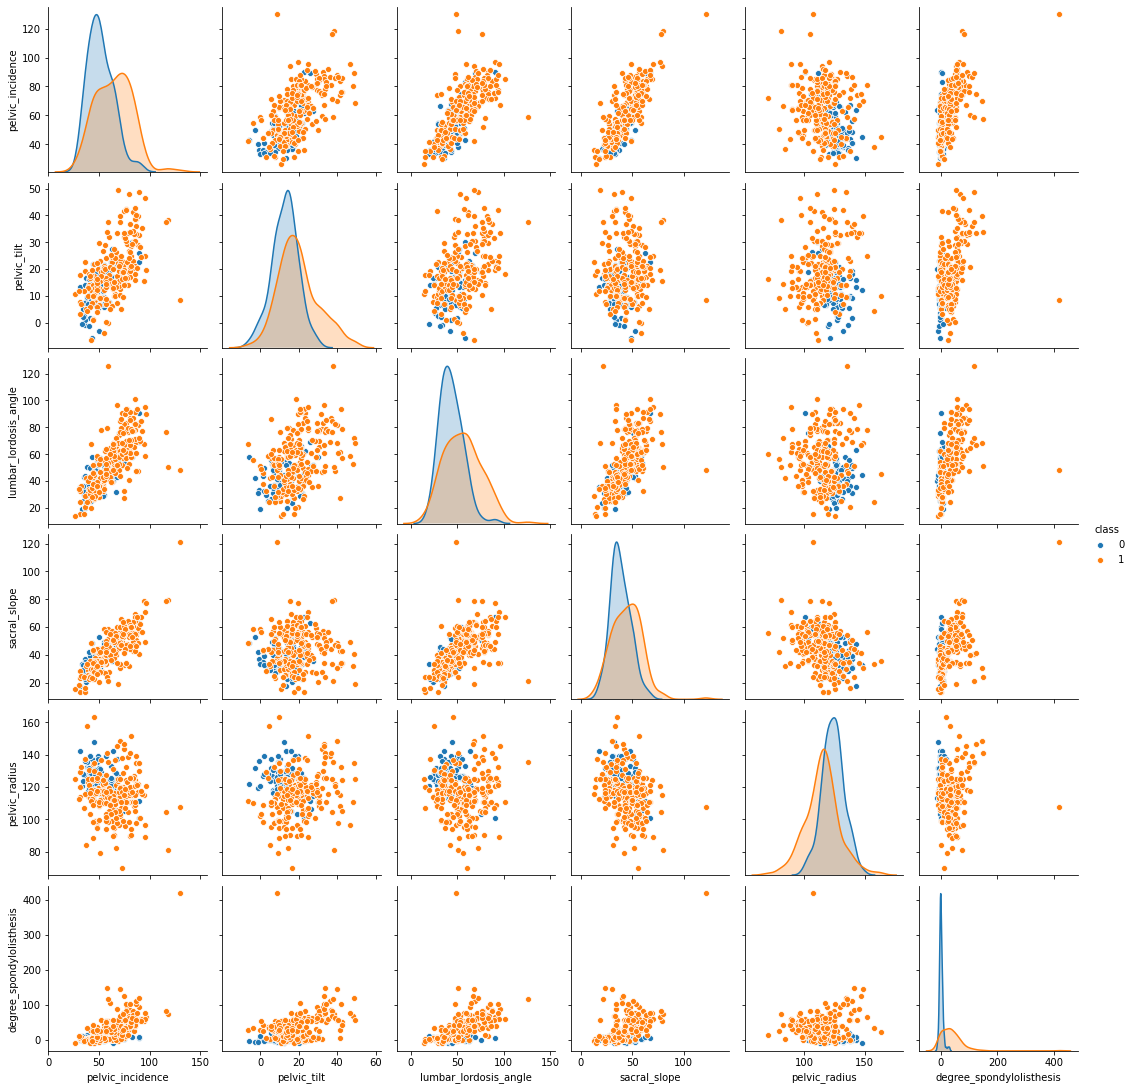

In [58]:
sns.pairplot(df, hue = 'class')

ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

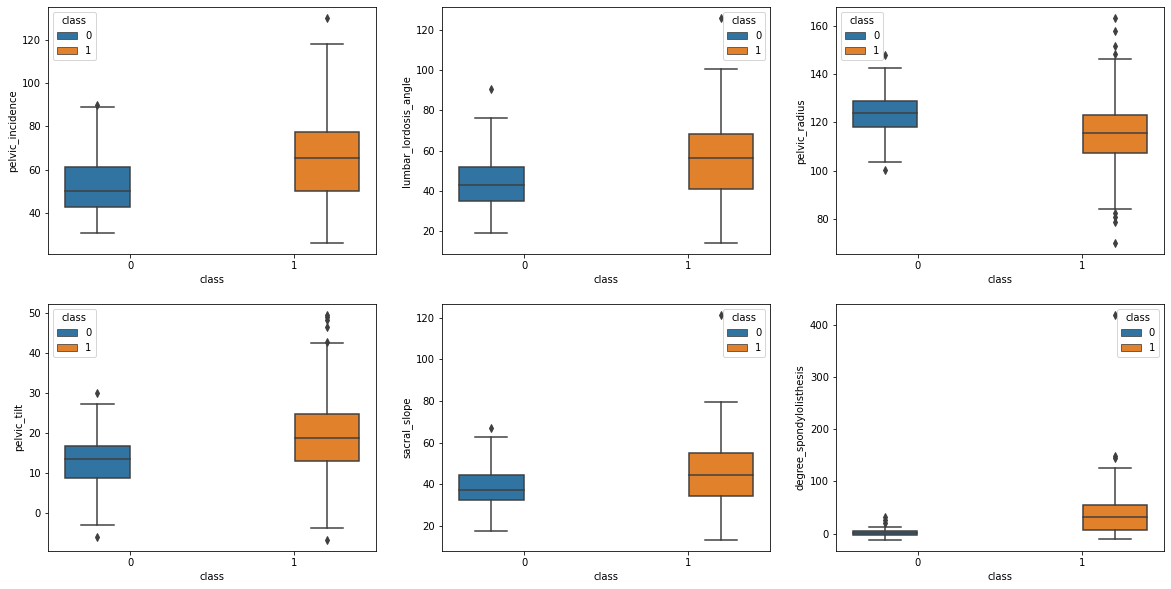

In [59]:
fig, ax_arr = plt.subplots(2,3, figsize=(20,10))

i, j = 0, 0

for var in variables:
    
    sns.boxplot(data=df, y=var, x="class",hue="class", ax = ax_arr[j][i])
    
    # move positon
    if j == 0:
        j = 1
    elif j == 1:
        j = 0
        i += 1

iii. Select the ﬁrst 70 rows of Class 0 and the ﬁrst 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [60]:
# divide dataset into train/test dataset
# normal dataset
normal_dataset = df[df['class'] == '0']
print(f"The size of normal_dataset is: {len(normal_dataset)}")
# abnormal dataset
abnormal_dataset = df[df['class'] == '1']
print(f"The size of abnormal_dataset is: {len(abnormal_dataset)}")
# training dataset
train_dataset = pd.concat([normal_dataset[:70], abnormal_dataset[:140]])
print(f"The size of train_dataset is: {len(train_dataset)}")
# test dataset
test_dataset = pd.concat([normal_dataset[70:], abnormal_dataset[140:]])
print(f"The size of train_dataset is: {len(test_dataset)}")

The size of normal_dataset is: 100
The size of abnormal_dataset is: 210
The size of train_dataset is: 210
The size of train_dataset is: 100


### (c) Classiﬁcation using KNN on Vertebral Column Data Set

ii.Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ { 208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k ∗ is the most suitable k among those values?

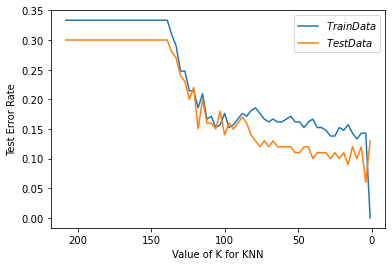

the most suitble K is 4


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Get training data and label
train_set = train_dataset.iloc[:,:6]
train_label = train_dataset['class']
# Get test data and label
test_set = test_dataset.iloc[:,:6]
test_label = test_dataset['class']

# k in (208, 205 ... 4, 1)
k_range = range(208, -1, -3)

# record train/test error rate
k_train_err = []
k_test_err = []

# record the most suitble K
optimal_k = 0
min_err = float("inf")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # train
    knn.fit(train_set, train_label)
    # test
    knn_pred_train = knn.predict(train_set)
    knn_pred = knn.predict(test_set)

    # calculate test error rate
    tmp_train_err = np.mean(knn_pred_train != train_label)
    k_train_err.append(tmp_train_err)
    tmp_test_err = np.mean(knn_pred != test_label)
    k_test_err.append(tmp_test_err)

    # update the most suitble K
    if tmp_test_err < min_err:
        min_err = tmp_test_err
        optimal_k = k

# plot test error with the change of K
plt.plot(k_range, k_train_err, label = '$Train Data$')
plt.plot(k_range, k_test_err, label = '$Test Data$')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Error Rate')
plt.gca().invert_xaxis() 
plt.legend(loc='upper right')
plt.show()

print(f"the most suitble K is {optimal_k}")

Calculate the confusion matrix, true positive rate, true negative rate, precision, and F 1 -score when k = k ∗ .

In [62]:
# the most suitble K is 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_set, train_label)
knn_pred = knn.predict(test_set)

# get the confusion matrix
tmp_confusion_matrix = confusion_matrix(test_label, knn_pred, labels = ['0', '1'])
print("the confusion matrix is as following:")
print(tmp_confusion_matrix)
print('\n')

# calculate true positive rate, true negative rate, precision, and F 1-score
TN, FP, FN, TP = tmp_confusion_matrix.ravel()
TPR = TP/(TP+FN)
TNR = TN/(FP+TN)
P = TP/(TP+FP)
R = TP/(TP+FN)
F_Score = 2*(P*R)/(P+R)
print('True Positive Rate:', TPR)
print('True Negative Rate:', TNR)
print('Precision:', P)
print('F-score:', F_Score)
print('\n')

# get the classification report
print("the classification report are as following:")
print(classification_report(test_label, knn_pred))

the confusion matrix is as following:
[[25  5]
 [ 1 69]]


True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F-score: 0.9583333333333333


the classification report are as following:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



iii.Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, 3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ { 10, 20, 30, . . . , 210 } . 4 Note: for each N, select your training set by choosing the ﬁrst ⌊ N/3 ⌋ rows of Class 0 and the ﬁrst N − ⌊ N/3 ⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from { 1, 6, 11, . . . , 196 } . This plot is called a Learning Curve.

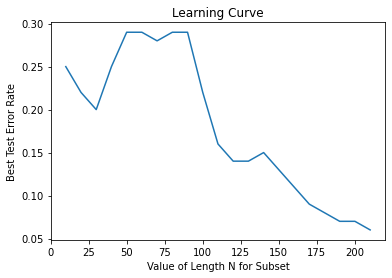

In [63]:
# generate the train subset
def getTrainDataset(n):
    true_part_num = n // 3
    false_part_num = n - true_part_num
    train_dataset = pd.concat([normal_dataset[:true_part_num], abnormal_dataset[:false_part_num]])
    train_set = train_dataset.iloc[:,:6]
    train_label = train_dataset['class']
    
    return train_set, train_label

# k in (208, 205 ... 4, 1)
k_range = range(208, -1, -3)

# n in (210, 200 ... 20, 10)
n_range = range(10, 211, 10)

# record the best test error for each n
best_err = []

for n in n_range:
    
    # new train subset
    train_set, train_label = getTrainDataset(n)
    
    # record test error rate
    k_test_err = []
    
    # record the most suitble K
    optimal_k = 0
    min_err = float("inf")
    
    for k in k_range: 
        if k > n: continue
        knn = KNeighborsClassifier(n_neighbors=k)
        # train
        knn.fit(train_set, train_label)
        # test (generate before)
        knn_pred = knn.predict(test_set)

        # calculate test error rate
        tmp_err = np.mean(knn_pred != test_label)
        k_test_err.append(tmp_err)

        # update the most suitble K
        if tmp_err < min_err:
            min_err = tmp_err
            optimal_k = k
            
    # record the best error for this n length subset
    best_err.append(min_err)

# plot test error with the change of K
plt.plot(n_range, best_err)
plt.title('Learning Curve')
plt.xlabel('Value of Length N for Subset')
plt.ylabel('Best Test Error Rate')
plt.show()

### (d) Replace the Euclidean metric with the following metrics 5and test them. Summarize the test errors (i.e., when k = k ∗ ) in a table. Use all of your training data and select the best k when { 1, 6, 11, . . . , 196 } .

In [64]:
# store best test err(when k = k*) for different metrics
diff_metric_test_err = {'K':{},'Error Rate':{}}

# new k range in {1, 6, ... , 196}
k_range = range(1,197,5)

# Get training data and label
train_set = train_dataset.iloc[:,:6]
train_label = train_dataset['class']
# Get test data and label
test_set = test_dataset.iloc[:,:6]
test_label = test_dataset['class']

i. Minkowski Distance

A. which becomes Manhattan Distance with p = 1.

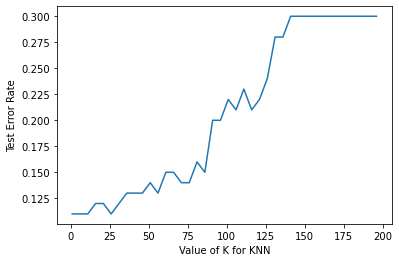

In [65]:
# record test error rate
k_test_err = []

# record the most suitble K
optimal_k = 0
min_err = float("inf")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski",p=1)
    # train
    knn.fit(train_set, train_label)
    # test
    knn_pred = knn.predict(test_set)
    
    # calculate test error rate
    tmp_err = np.mean(knn_pred != test_label)
    k_test_err.append(tmp_err)
    
    # update the most suitble K
    if tmp_err <= min_err:
        min_err = tmp_err
        optimal_k = k

# record best test rate when metric is Manhattan Distance
diff_metric_test_err["K"]['Manhattan Distance'] = "1,6,11,26"
diff_metric_test_err["Error Rate"]['Manhattan Distance'] = min_err

manhattan_optimal_k = optimal_k

plt.plot(k_range, k_test_err)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Error Rate')
plt.show()

B. with log 10(p) ∈ { 0.1, 0.2, 0.3, . . . , 1 } . In this case, use the k ∗ you found for the Manhattan distance in 1(d)iA. What is the best log 10 (p)?

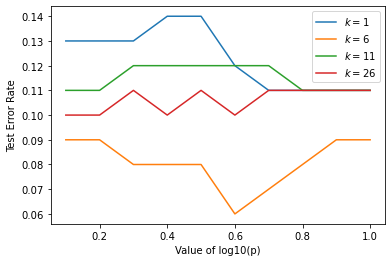

the best log 10(p) is 0.6 when k = 6


In [66]:
# the k∗ for Manhattan distance in 1(d)iA is 1 or 6 or 11 or 26


# record test error rate
k_test_err = [[],[],[],[]]

log_p_range = np.arange(0.1, 1.1, 0.1)

for value in log_p_range:
    tmpP = 10**value
    # k = 1 or k = 6 or k = 11 or k = 26
    for i,k in enumerate([1, 6, 11, 26]):
        
        knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=tmpP)

        # train
        knn.fit(train_set, train_label)

        # test
        knn_pred = knn.predict(test_set)

        # calculate test error rate
        tmp_err = np.mean(knn_pred != test_label)
        k_test_err[i].append(tmp_err)

# plot the test error rate with the change of log10(p)
plt.plot(log_p_range, k_test_err[0], label = '$k = 1$')
plt.plot(log_p_range, k_test_err[1], label = '$k = 6$')
plt.plot(log_p_range, k_test_err[2], label = '$k = 11$')
plt.plot(log_p_range, k_test_err[3], label = '$k = 26$')

plt.xlabel('Value of log10(p)')
plt.ylabel('Test Error Rate')
plt.legend(loc='upper right')
plt.show()


print("the best log 10(p) is 0.6 when k = 6")


C. which becomes Chebyshev Distance with p → ∞

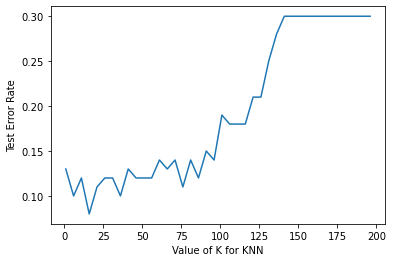


best k is: 16
best test error rate is: 0.08


In [67]:
# record test error rate
k_test_err = []

# record the most suitble K
optimal_k = 0
min_err = float("inf")

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski",p=float("inf"))
    # train
    knn.fit(train_set, train_label)
    # test
    knn_pred = knn.predict(test_set)
    
    # calculate test error rate
    tmp_err = np.mean(knn_pred != test_label)
    k_test_err.append(tmp_err)
    
    # update the most suitble K
    if tmp_err <= min_err:
        min_err = tmp_err
        optimal_k = k

# record best test rate when metric is Chebyshev Distance
diff_metric_test_err["K"]['Chebyshev Distance'] = optimal_k
diff_metric_test_err["Error Rate"]['Chebyshev Distance'] = min_err

manhattan_optimal_k = optimal_k

plt.plot(k_range, k_test_err)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Error Rate')
plt.show()

print("")
print("best k is:",optimal_k)
print("best test error rate is:",min_err)

ii. Mahalanobis Distance

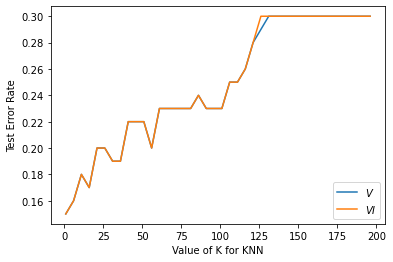

In [68]:
# record test error rate
k_test_err_v = []
k_test_err_vi = []

# record the most suitble K
optimal_k_v = 0
min_err_v = float("inf")
optimal_k_vi = 0
min_err_vi = float("inf")

for k in k_range:
    # two methods: V and VI
    knn_v = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'V':np.cov(train_set, rowvar=False)})
    knn_vi = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI':np.linalg.inv(np.cov(train_set, rowvar=False))})
    # train
    knn_v.fit(train_set, train_label)
    knn_vi.fit(train_set, train_label)
    # test
    knn_pred_v = knn_v.predict(test_set)
    knn_pred_vi = knn_vi.predict(test_set)
    # calculate test error rate
    tmp_err_v = np.mean(knn_pred_v != test_label)
    tmp_err_vi = np.mean(knn_pred_vi != test_label)
    k_test_err_v.append(tmp_err_v)
    k_test_err_vi.append(tmp_err_vi)
    
    # update the most suitble K
    if tmp_err_v <= min_err_v:
        min_err_v = tmp_err_v
        optimal_k_v = k
    if tmp_err_vi <= min_err_vi:
        min_err_vi = tmp_err_vi
        optimal_k_vi = k

# record best test rate when metric is mahalanobis Distance
diff_metric_test_err["K"]['Mahalanobis Distance V'] = optimal_k_v
diff_metric_test_err["Error Rate"]['Mahalanobis Distance V'] = min_err_v
diff_metric_test_err["K"]['Mahalanobis Distance VI'] = optimal_k_vi
diff_metric_test_err["Error Rate"]['Mahalanobis Distance VI'] = min_err_vi

manhattan_optimal_k = optimal_k

plt.plot(k_range, k_test_err_v, label = '$V$')
plt.plot(k_range, k_test_err_vi, label = '$VI$')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Error Rate')
plt.legend(loc='lower right')
plt.show()

Summarize the test errors (i.e., when k = k ∗ ) in a table

In [69]:
pd.DataFrame.from_dict(diff_metric_test_err)

,K,Error Rate
Manhattan Distance,"1,6,11,26",0.11
Chebyshev Distance,16,0.08
Mahalanobis Distance V,1,0.15
Mahalanobis Distance VI,1,0.15


### (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater inﬂuence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ { 1, 6, 11, 16, . . . , 196 } .

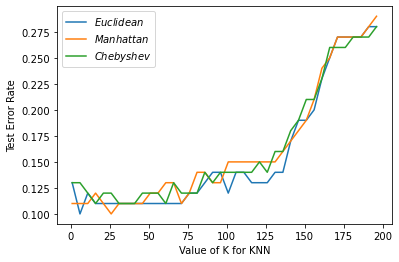

best test error rate using Euclidean is: 0.1
best test error rate using Manhattan is: 0.1
best test error rate using Chebyshev is: 0.11


In [70]:
# record test error rate
k_test_err = [[],[],[]]

# record the most suitble K
optimal_k = [0,0,0]
min_err = [float("inf"),float("inf"),float("inf")]

for k in k_range:
    knn_e = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_m = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1, weights='distance')
    knn_c = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=float("inf"), weights='distance')
    
    # train
    knn_e.fit(train_set, train_label)
    knn_m.fit(train_set, train_label)
    knn_c.fit(train_set, train_label)
    
    # test
    knn_pred_e = knn_e.predict(test_set)
    knn_pred_m = knn_m.predict(test_set)
    knn_pred_c = knn_c.predict(test_set)
    
    # calculate test error rate
    tmp_err_e = np.mean(knn_pred_e != test_label)
    tmp_err_m = np.mean(knn_pred_m != test_label)
    tmp_err_c = np.mean(knn_pred_c != test_label)
    
    k_test_err[0].append(tmp_err_e)
    k_test_err[1].append(tmp_err_m)
    k_test_err[2].append(tmp_err_c)
    
    # update the most suitble K
    if tmp_err_e <= min_err[0]:
        min_err[0] = tmp_err_e
        optimal_k[0] = k
    if tmp_err_m <= min_err[1]:
        min_err[1] = tmp_err_m
        optimal_k[1] = k
    if tmp_err_c <= min_err[2]:
        min_err[2] = tmp_err_c
        optimal_k[2] = k

plt.plot(k_range, k_test_err[0], label = '$Euclidean$')
plt.plot(k_range, k_test_err[1], label = '$Manhattan$')
plt.plot(k_range, k_test_err[2], label = '$Chebyshev$')
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Error Rate')
plt.legend(loc='upper left')
plt.show()

print("best test error rate using Euclidean is:",min_err[0])
print("best test error rate using Manhattan is:",min_err[1])
print("best test error rate using Chebyshev is:",min_err[2])

### (f) What is the lowest training error rate you achieved in this homework?

the lowest training error rate I achieved is 0 when k is 1